### Check data quality

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(data_dir):
    phases = ['train', 'dev', 'test']
    labels = ['normal', 'spoof']
    
    stats = []
    
    for phase in phases:
        for label in labels:
            path = os.path.join(data_dir, phase, label)
            if os.path.exists(path):
                # Đếm số lượng file ảnh
                count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
                stats.append({
                    'subset': phase,
                    'label': label,
                    'count': count
                })
    
    # Hiển thị số liệu
    print(f"{'Subset':<10} | {'Label':<10} | {'Count':<10}")
    print("-" * 35)
    
    # Biến để tính toán tỉ lệ cho tập Train (quan trọng nhất)
    train_normal = 0
    train_spoof = 0
    
    for s in stats:
        print(f"{s['subset']:<10} | {s['label']:<10} | {s['count']:<10}")
        if s['subset'] == 'train':
            if s['label'] == 'normal': train_normal = s['count']
            if s['label'] == 'spoof': train_spoof = s['count']

    # Vẽ biểu đồ
    subsets = [s['subset'] for s in stats]
    labels_list = [s['label'] for s in stats]
    counts = [s['count'] for s in stats]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=subsets, y=counts, hue=labels_list)
    plt.title('Data Distribution: Normal vs Spoof')
    plt.ylabel('Number of Images')
    plt.show()

    # TƯ VẤN CHIẾN LƯỢC TRAINING
    print("\n=== STRATEGY REPORT ===")
    if train_normal > 0 and train_spoof > 0:
        ratio = train_spoof / train_normal
        print(f"Train Ratio (Spoof/Normal): {ratio:.2f}")
        
        if ratio > 1.5:
            print(f"⚠️ CẢNH BÁO: Dữ liệu Spoof gấp {ratio:.2f} lần Normal.")
            print(f"👉 KHUYẾN NGHỊ: Sử dụng Weighted Loss.")
            print(f"   Trong code training, hãy set pos_weight = torch.tensor([{ratio:.2f}]) trong BCEWithLogitsLoss")
        elif ratio < 0.6:
             print(f"⚠️ CẢNH BÁO: Dữ liệu Normal gấp {1/ratio:.2f} lần Spoof.")
             print("👉 KHUYẾN NGHỊ: Cần Oversampling hoặc Weighted Loss.")
        else:
            print("✅ Dữ liệu khá cân bằng. Có thể dùng Standard BCE Loss.")
    else:
        print("❌ Lỗi: Không tìm thấy dữ liệu trong tập Train!")

Subset     | Label      | Count     
-----------------------------------
train      | normal     | 1432      
train      | spoof      | 1368      
dev        | normal     | 551       
dev        | spoof      | 524       
test       | normal     | 480       
test       | spoof      | 456       


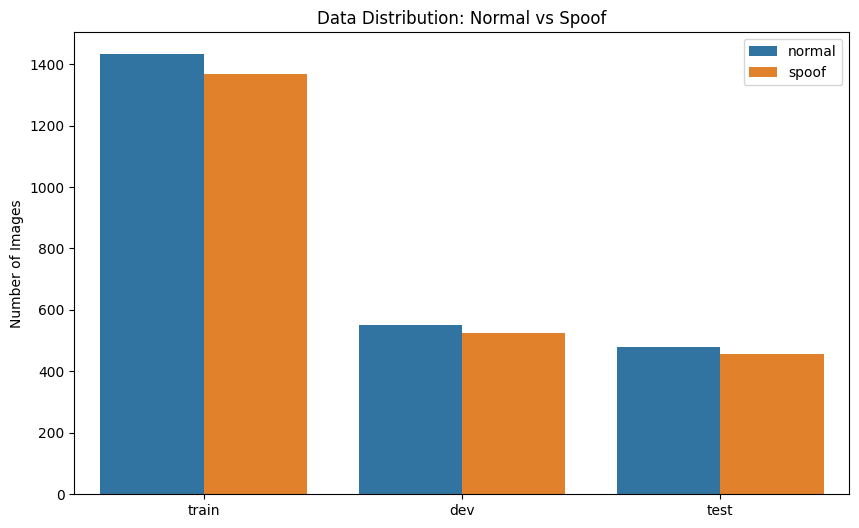


=== STRATEGY REPORT ===
Train Ratio (Spoof/Normal): 0.96
✅ Dữ liệu khá cân bằng. Có thể dùng Standard BCE Loss.


In [3]:
analyze_dataset('../data/raw')

In [ ]:
analyze_dataset('./data/processed')